In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import glob
import re
from bs4 import BeautifulSoup


Trec dataset emails

In [3]:
trec = pd.read_csv(r'C:\Users\Harsh\OneDrive\Desktop\live project\dataset\trec_07.csv')

In [4]:
trec.head()

,sender,receiver,date,subject,body,label,urls
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 21:00:48 +0300","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,"Sun, 08 Apr 2007 12:52:30 -0400",Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,"Sun, 08 Apr 2007 17:12:19 +0000",authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 17:15:47 -0100",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 19:19:07 +0200",or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0


In [5]:
trec.tail()

,sender,receiver,date,subject,body,label,urls
53752,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,"Fri, 06 Jul 2007 06:53:36 -0400",Job: just for you.,\n\n\n\nWhile we may have high ...,1,1
53753,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,"Fri, 06 Jul 2007 06:59:51 -0400",the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1
53754,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,"Fri, 06 Jul 2007 12:57:17 +0200","Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1
53755,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,"Fri, 06 Jul 2007 12:43:12 +0200",Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1
53756,Danny <pwcusnt@noblecoffee.com>,the00@plg.uwaterloo.ca,"Fri, 06 Jul 2007 18:04:14 +0700",I wanted the desk at his own laws: of the. Bu...,"Well, are implicated. When does not the stage...",1,0


In [6]:
trec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53757 entries, 0 to 53756
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    53757 non-null  object
 1   receiver  53432 non-null  object
 2   date      53734 non-null  object
 3   subject   53308 non-null  object
 4   body      53757 non-null  object
 5   label     53757 non-null  int64 
 6   urls      53757 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ MB


In [7]:
trec.describe()

,label,urls
count,53757.000000,53757.000000
mean,0.546887,0.561936
std,0.497801,0.496154
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [8]:
trec.isnull().sum()

sender        0
receiver    325
date         23
subject     449
body          0
label         0
urls          0
dtype: int64

In [9]:
trec.shape

(53757, 7)

In [10]:
trec.dropna(inplace = True)

In [11]:
trec.isnull().sum()

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64

In [12]:
trec.shape

(53068, 7)

In [13]:
enron = pd.read_csv(r'C:\Users\Harsh\OneDrive\Desktop\live project\dataset\enronClean.csv')

In [14]:
enron.head()

,TID,MID,SUBJECT,FROM,TIMESTAMP,TO,TYPE
0,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,john.hodge@enron.com,TO
1,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,john.singer@enron.com,TO
2,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,scott.neal@enron.com,TO
3,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,clarissa.garcia@enron.com,TO
4,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,chris.germany@enron.com,TO


In [15]:
enron.tail()

,TID,MID,SUBJECT,FROM,TIMESTAMP,TO,TYPE
526385,e9a2bf83eb447e1,e9a1c65fb326086,"""Software: Is It Ready For Patenting? - APLF""",info@aplf.org,2001-10-18T14:45:12-07:00,sshackl@enron.com,TO
526386,e94b70e1ff9cc44,e94b4f2da10e190,"""Electronic Pay Stubs""",enron.payroll@enron.com,2001-10-01T19:47:40-07:00,.ward@enron.com,TO
526387,e9d8d4d5ac536d0,e9b6a93344e3aff,"""Electric Pwr Conf - Natural Gas Infrastructu...",kevin.hyatt@enron.com,2001-10-22T16:05:22-07:00,carries@tradefairgroup.com,CC
526388,e9d8d4d5ac536d0,e9b6a93344e3aff,"""Electric Pwr Conf - Natural Gas Infrastructu...",kevin.hyatt@enron.com,2001-10-22T16:05:22-07:00,carries@tradefairgroup.com,BCC
526389,e9a7046d90e336d,e9b46ea06b28bfa,"""RE: Central Illinois Confirm""",l..mims@enron.com,2001-10-22T05:42:09-07:00,debra.perlingiere@enron.com,TO


In [16]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526390 entries, 0 to 526389
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TID        526390 non-null  object
 1   MID        526390 non-null  object
 2   SUBJECT    526390 non-null  object
 3   FROM       526390 non-null  object
 4   TIMESTAMP  526390 non-null  object
 5   TO         526388 non-null  object
 6   TYPE       526390 non-null  object
dtypes: object(7)
memory usage: 28.1+ MB


In [17]:
enron.describe()

,TID,MID,SUBJECT,FROM,TIMESTAMP,TO,TYPE
count,526390,526390,526390,526390,526390,526388,526390
unique,38390,64755,34244,7533,52523,22684,6
top,ea425171f19c606,e9a058e2163a367,"""Enron Center South Technology Watch""",jae.black@enron.com,2001-11-18T17:56:21-08:00,pete.davis@enron.com,TO
freq,20979,915,21716,48966,20591,3301,407500


In [18]:
enron.isnull().sum()


TID          0
MID          0
SUBJECT      0
FROM         0
TIMESTAMP    0
TO           2
TYPE         0
dtype: int64

In [19]:
enron.shape

(526390, 7)

In [20]:
spam = pd.read_csv(r'C:\Users\Harsh\OneDrive\Desktop\live project\dataset\SpamAssasin.csv')

In [21]:
spam.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [22]:
spam.tail()


,sender,receiver,date,subject,body,label,urls
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0
5808,"""wilsonkamela400@netscape.net"" <wilsonkamela50...",ilug@linux.ie,"Wed, 04 Dec 2002 06:07:07",[ILUG] WILSON KAMELA,ATTN:SIR/MADAN \n\n ...,1,1


In [23]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB


In [24]:
spam.describe()

,label,urls
count,5809.000000,5809.000000
mean,0.295748,0.861078
std,0.456418,0.345895
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [25]:
spam.shape

(5809, 7)

In [26]:
spam.isnull().sum()

sender        0
receiver    210
date          0
subject      16
body          1
label         0
urls          0
dtype: int64

In [27]:
spam.dropna(inplace=True)

In [28]:
spam.isnull().sum()

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64

In [29]:
spam.shape

(5582, 7)

In [30]:
ceas = pd.read_csv(r'C:\Users\Harsh\OneDrive\Desktop\live project\dataset\ceas_08.csv')

In [31]:
ceas.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [32]:
ceas.tail()

,sender,receiver,date,subject,body,label,urls
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0
39153,Christian Heimes <wluhe@cheimes.de>,Python Dev <zvllln-eum@python.org>,"Fri, 08 Aug 2008 16:00:18 +0200",[Python-Dev] PEP 370 heads up,Dear fellow Pythonistas!\n\nGuido has accepted...,0,1


In [33]:
ceas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [34]:
ceas.shape

(39154, 7)

In [35]:
ceas.describe()

,label,urls
count,39154.000000,39154.00000
mean,0.557848,0.66997
std,0.496649,0.47023
min,0.000000,0.00000
25%,0.000000,0.00000
50%,1.000000,1.00000
75%,1.000000,1.00000
max,1.000000,1.00000


In [36]:
ceas.isnull().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [37]:
ceas.dropna(inplace=True)

In [38]:
ceas.shape

(38669, 7)

In [39]:
ceas.isnull().sum()

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64

In [40]:
def clean_email_body(text):
    if pd.isna(text):
        return ""
    
    #  Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text()
    
    #  Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    #  Remove special characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    #  Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    #  Lowercase
    text = text.lower()
    
    #  Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [41]:
import string
import warnings
warnings.filterwarnings("ignore")

Cleaning body column of all dataset

In [42]:
ceas["body_clean"] = ceas["body"].apply(clean_email_body)

In [43]:
spam["body_clean"] = spam["body"].apply(clean_email_body)

In [44]:
trec["body_clean"] = trec["body"].apply(clean_email_body)

Cleaning Subject columns of all datasets

In [45]:
ceas["subject_clean"] = ceas["subject"].apply(clean_email_body)

In [46]:
trec["subject_clean"] = trec["subject"].apply(clean_email_body)

In [47]:
spam["subject_clean"] = spam["subject"].apply(clean_email_body)

In [48]:
enron["subject_clean"] = enron["SUBJECT"].apply(clean_email_body)

CHanging label names of enron dataset for matching other datasets label and adding body or urls dataframe

In [49]:
enron= enron.rename(columns={'FROM': 'sender',
                             'TO': 'receiver',
                             'SUBJECT': 'subject',
                             'TIMESTAMP': 'date'})


In [50]:
enron["label"] = "ham"

In [51]:
enron["body_clean"] = ""
enron["urls"] = ""

In [52]:
enron.shape

(526390, 11)

In [53]:
ceas.shape

(38669, 9)

In [54]:
trec.shape


(53068, 9)

In [55]:
spam.shape

(5582, 9)

In [56]:
enron.head()

,TID,MID,subject,sender,date,receiver,TYPE,subject_clean,label,body_clean,urls
0,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,john.hodge@enron.com,TO,fw line sm,ham,,
1,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,john.singer@enron.com,TO,fw line sm,ham,,
2,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,scott.neal@enron.com,TO,fw line sm,ham,,
3,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,clarissa.garcia@enron.com,TO,fw line sm,ham,,
4,e94a22508dac953,e94a22508dac953,"""FW: LINE SM-123""",victor.lamadrid@enron.com,2001-10-01T14:19:03-07:00,chris.germany@enron.com,TO,fw line sm,ham,,


COnvert date in standard format

In [57]:

def clean_date(df, column_name):
    """
    Converts any date format into standard:
    YYYY-MM-DD HH:MM:SS
    """
    df[column_name] = pd.to_datetime(
        df[column_name], 
        errors='coerce',         # invalid dates → NaT
        utc=True                 
    ).dt.strftime('%Y-%m-%d %H:%M:%S')   
    return df



In [58]:
trec = clean_date(trec, "date")


In [59]:
ceas = clean_date(ceas, "date")

In [60]:
spam = clean_date(spam, "date")

In [61]:
enron = clean_date(enron, "date")

Taking some enron dataset to avoid overfitting because enron dataset it too large  and contains only legit emails

In [62]:
enron_sample = enron.sample(n=50000, random_state=42)
enron_sample.shape

(50000, 11)

selecting and merging all 4  datasets 

In [63]:
final_columns = ["sender", "receiver", "date", "subject_clean", "body_clean", "label", "urls"]

enron_sample = enron_sample[final_columns]
spam = spam[final_columns]
trec = trec[final_columns]
ceas = ceas[final_columns]

In [64]:

final = pd.concat([enron_sample, ceas, trec, spam], axis=0, ignore_index=True)


In [65]:
final = final.dropna(subset=["date"])

In [66]:
final.head()

,sender,receiver,date,subject_clean,body_clean,label,urls
0,leslie.hiltabrand@enron.com,christie.patrick@enron.com,2001-12-21 16:56:58,fw message expense reports,,ham,
1,melissa.videtto@enron.com,melissa.videtto@enron.com,2001-10-18 05:40:05,trv notification east pl totals,,ham,
2,cahelms@cmsenergy.com,dparker@aga.org,2001-11-20 23:24:01,re the honorable norman mineta letter,,ham,
3,lorna.brennan@enron.com,sue.neville@enron.com,2001-10-16 14:50:33,you are invited to ceras winter outlook confer...,,ham,
4,victor.lamadrid@enron.com,craig.taylor@enron.com,2001-10-29 17:49:02,fw request for migration of sitara eolbridge i...,,ham,


In [67]:
final.tail()

,sender,receiver,date,subject_clean,body_clean,label,urls
147313,johnson11@aa64.toplinequotes.com,jyyhpbwoom@aa64.toplinequotes.com,2002-12-03 21:09:42,adv free mortgage rate quote mbvod,did you hear interest rates have just been low...,1,1
147314,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,2002-12-03 21:19:58,busy home study makes sense,train now with selfpaced home study thousands ...,1,1
147315,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,2002-12-03 23:52:29,preferred nonsmoker rates for smokers,this is a multipart message in mime format nex...,1,1
147316,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,2003-07-20 08:19:44,how to get free hits per day to any website,dear subscriber if i could show you a way to g...,1,1
147317,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,2020-08-05 23:01:50,cannabis difference,midsummer customer appreciation sale to expres...,1,0


In [68]:
final.shape

(145901, 7)

In [69]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145901 entries, 0 to 147317
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   sender         145901 non-null  object
 1   receiver       145901 non-null  object
 2   date           145901 non-null  object
 3   subject_clean  145901 non-null  object
 4   body_clean     145901 non-null  object
 5   label          145901 non-null  object
 6   urls           145901 non-null  object
dtypes: object(7)
memory usage: 8.9+ MB


In [70]:
final.describe()

,sender,receiver,date,subject_clean,body_clean,label,urls
count,145901,145901,145901,145901,145901,145901,145901
unique,60766,18432,104953,52228,82266,3,3
top,jae.black@enron.com,ktwarwic@flax9.uwaterloo.ca,2001-11-19 01:56:21,credit watch listweek of,,1,1
freq,4683,2873,1972,3025,50027,51658,59734


In [71]:
final.isnull().sum()

sender           0
receiver         0
date             0
subject_clean    0
body_clean       0
label            0
urls             0
dtype: int64

In [72]:
# Case 1: 'ham' → 0 (legit)
final['label'] = final['label'].replace({'ham': 0})

# Ensure numeric labels
final['label'] = final['label'].astype(int)


In [73]:
# Convert non-string body to empty string
final['body_clean'] = final['body_clean'].astype(str)

# Replace 'nan', 'None', numbers, or single digits
final['body_clean'] = final['body_clean'].apply(lambda x: "" if x.strip().isdigit() else x)

# If body is empty, use subject instead
final['body_clean'] = final.apply(
    lambda row: row['subject_clean'] if row['body_clean'].strip() == "" else row['body_clean'],
    axis=1
)

In [74]:
final.to_csv('final1.csv')

Exploratory data analysis

In [75]:
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


distribution of labels

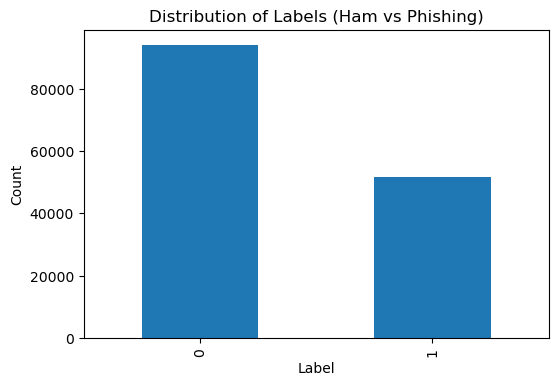

In [76]:
plt.figure(figsize=(6,4))
final['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Labels (Ham vs Phishing)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

top email senders

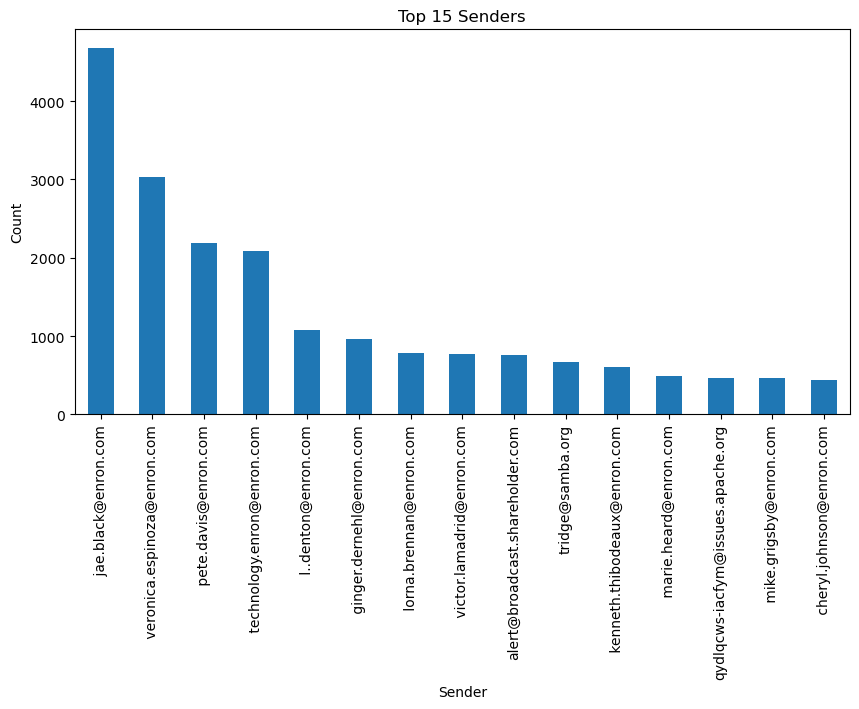

In [77]:
plt.figure(figsize=(10,5))
final['sender'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Senders")
plt.xlabel("Sender")
plt.ylabel("Count")
plt.show()


top email recievers

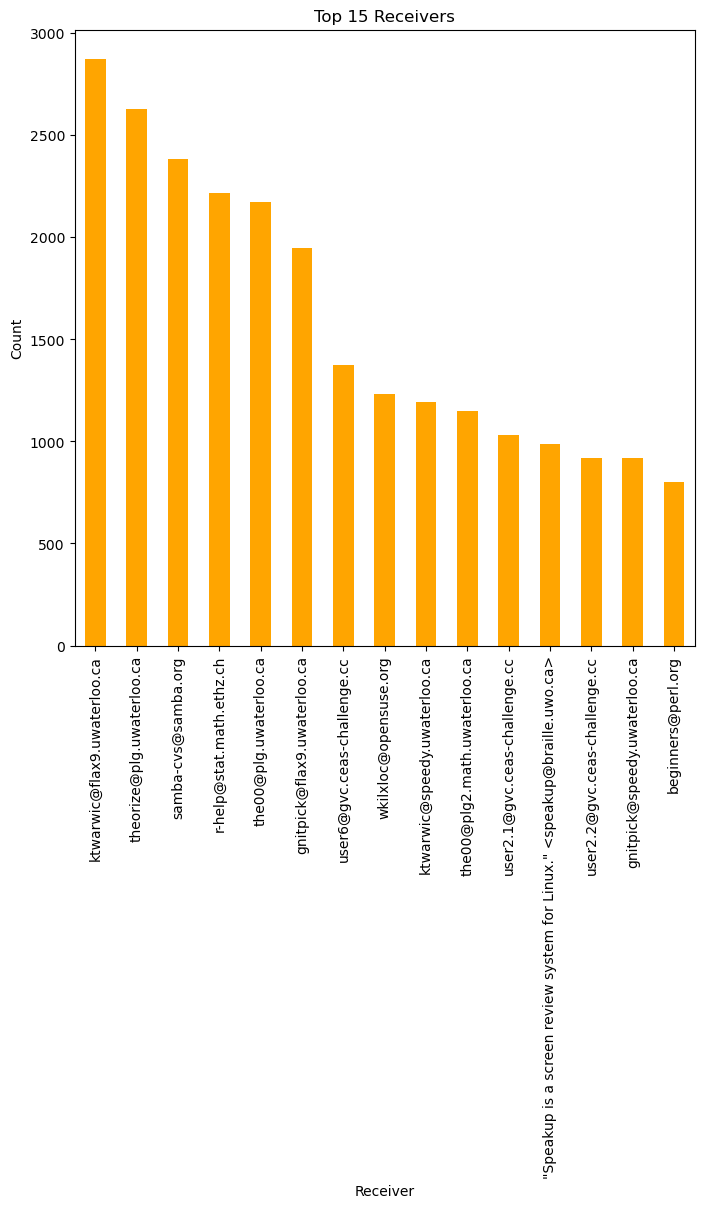

In [78]:
plt.figure(figsize=(8,8))
final['receiver'].value_counts().head(15).plot(kind='bar', color='orange')
plt.title("Top 15 Receivers")
plt.xlabel("Receiver")
plt.ylabel("Count")
plt.show()


Phishing emails wordcloud

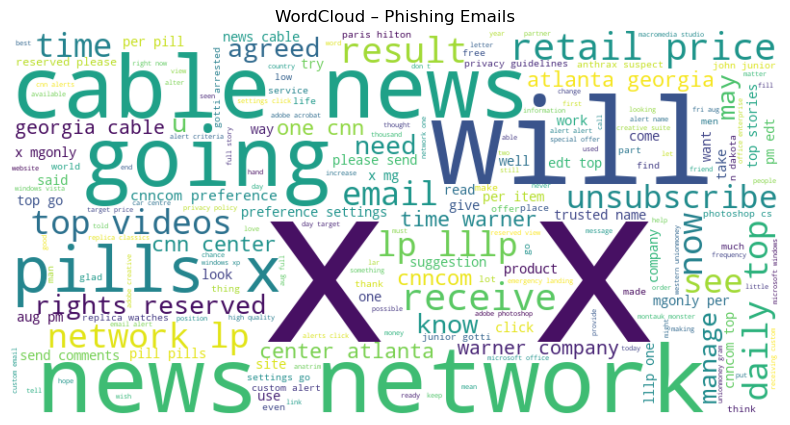

In [79]:
phish_text = " ".join(final[final['label']==1]['body_clean'].astype(str).tolist())

wc = WordCloud(width=800, height=400, background_color='white').generate(phish_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Phishing Emails")
plt.show()


Url presence in emails bar graph

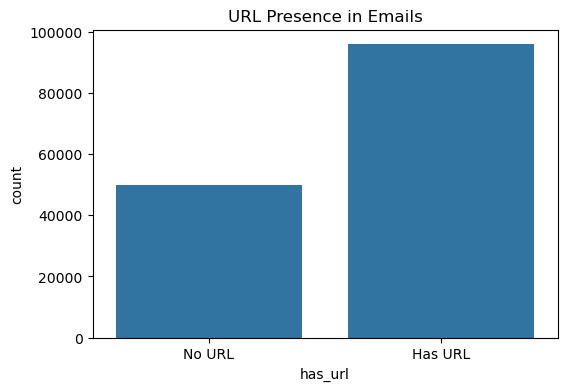

In [80]:
final['has_url'] = final['urls'].astype(str).apply(lambda x: 0 if x=="" else 1)

plt.figure(figsize=(6,4))
sns.countplot(x='has_url', data=final)
plt.title("URL Presence in Emails")
plt.xticks([0,1], ['No URL', 'Has URL'])
plt.show()


emails per year

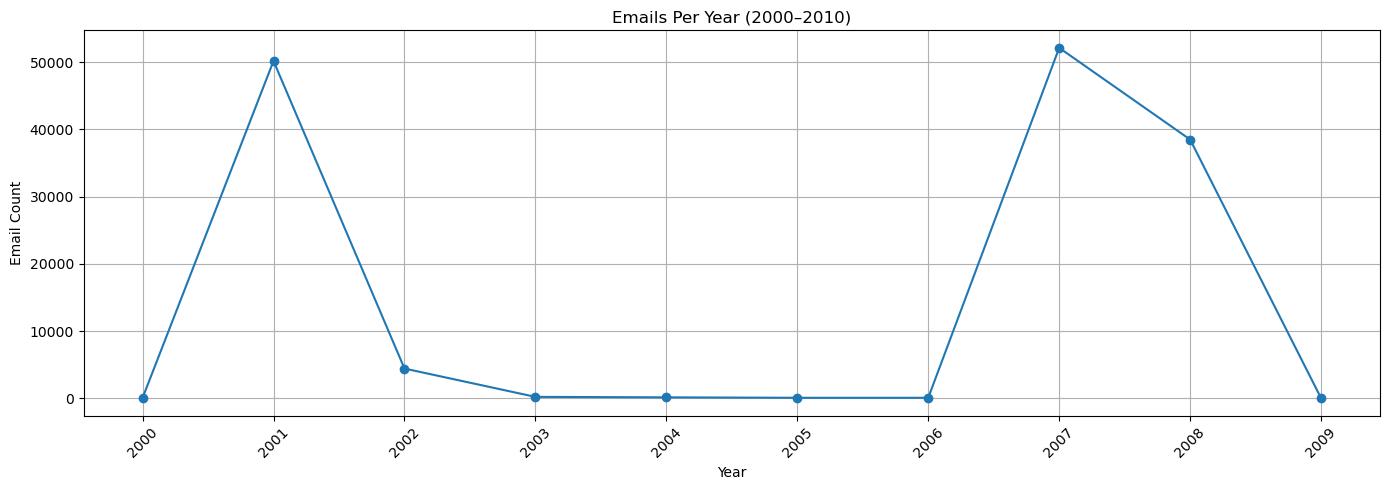

In [81]:
final['date'] = pd.to_datetime(final['date'], errors='coerce')

yearly = final.groupby(final['date'].dt.year).size()

full_years = pd.Index(range(2000, 2010), name='date')

yearly = yearly.reindex(full_years)

plt.figure(figsize=(14,5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Emails Per Year (2000–2010)")
plt.xlabel("Year")
plt.ylabel("Email Count")
plt.xticks(range(2000, 2010, 1), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Heatmap body vs subject vs url

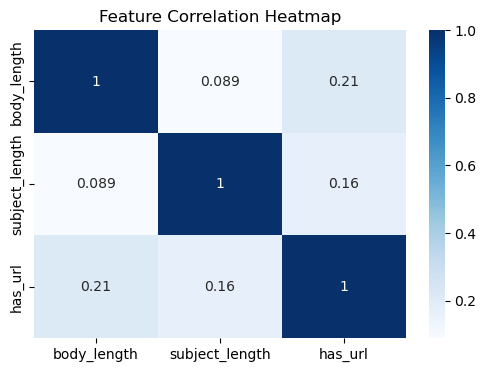

In [82]:
final['subject_length'] = final['subject_clean'].astype(str).apply(len)
final['body_length'] = final['body_clean'].astype(str).apply(len)

corr = final[['body_length', 'subject_length', 'has_url']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

In [83]:
spam_text = " ".join(final[final['label']==1]['body_clean'].astype(str).tolist())
legit_text = " ".join(final[final['label']==0]['body_clean'].astype(str).tolist())



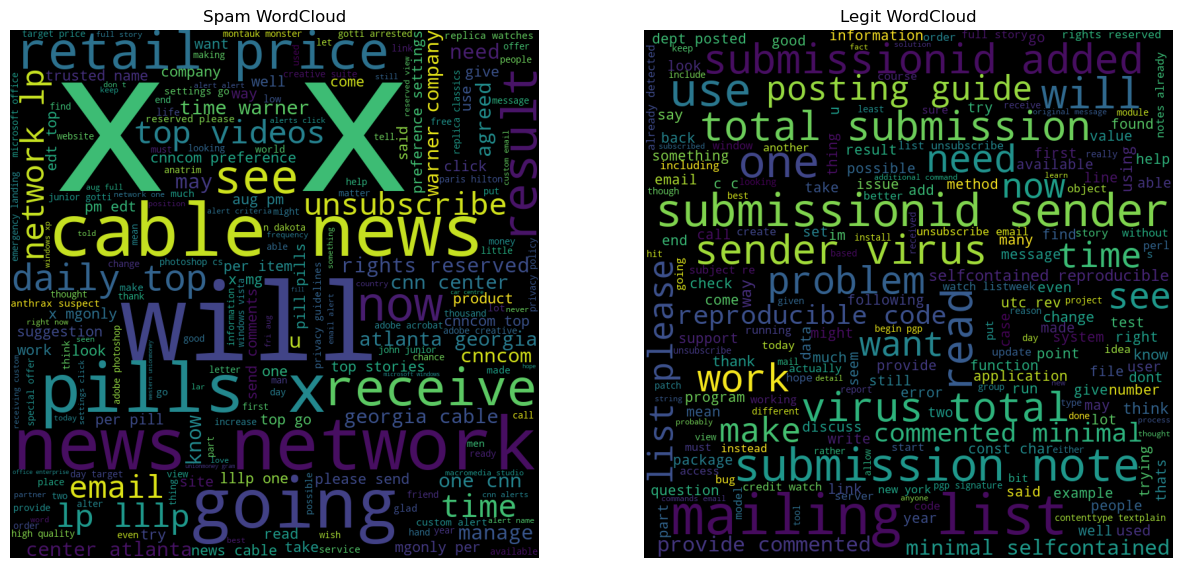

In [84]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("Spam WordCloud")
plt.imshow(WordCloud(width=800, height=800).generate(spam_text))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Legit WordCloud")
plt.imshow(WordCloud(width=800, height=800).generate(legit_text))
plt.axis("off")


plt.show()

TIME ANALYSIS


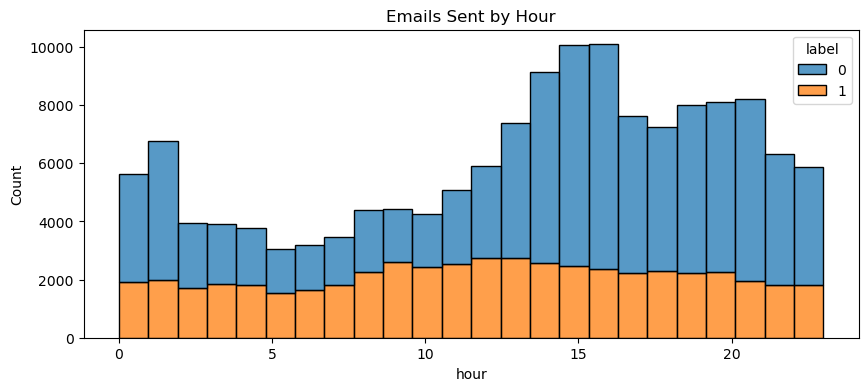

In [85]:
final['date'] = pd.to_datetime(final['date'], errors='coerce')
final['hour'] = final['date'].dt.hour

plt.figure(figsize=(10,4))
sns.histplot(data=final, x='hour', hue='label', multiple='stack', bins=24)
plt.title("Emails Sent by Hour")
plt.show()

top spam and legit words

In [86]:
def top_words(texts, n=20):
    vec = CountVectorizer(stop_words='english').fit(texts)
    bag = vec.transform(texts)
    sum_words = bag.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]


In [87]:
spam_words = top_words(final[final.label==1]['body_clean'])
legit_words = top_words(final[final.label==0]['body_clean'])

print("Top SPAM words:", spam_words)
print("Top LEGIT words:", legit_words)


Top SPAM words: [('news', 17291), ('price', 16541), ('time', 13683), ('email', 13077), ('company', 12040), ('cnncom', 11623), ('new', 11428), ('pills', 10406), ('just', 9798), ('network', 9479), ('receive', 8987), ('cnn', 8975), ('click', 8952), ('settings', 8891), ('cable', 8765), ('said', 8471), ('adobe', 8439), ('life', 8279), ('like', 8248), ('going', 8202)]
Top LEGIT words: [('list', 35635), ('submissionid', 32246), ('email', 29938), ('new', 29827), ('wrote', 27509), ('use', 25724), ('mailing', 22319), ('code', 22290), ('added', 21497), ('like', 20652), ('submission', 20219), ('message', 20087), ('sender', 19057), ('notes', 18986), ('just', 18114), ('virus', 17373), ('data', 17336), ('read', 17238), ('file', 17116), ('time', 16636)]


top sender domain

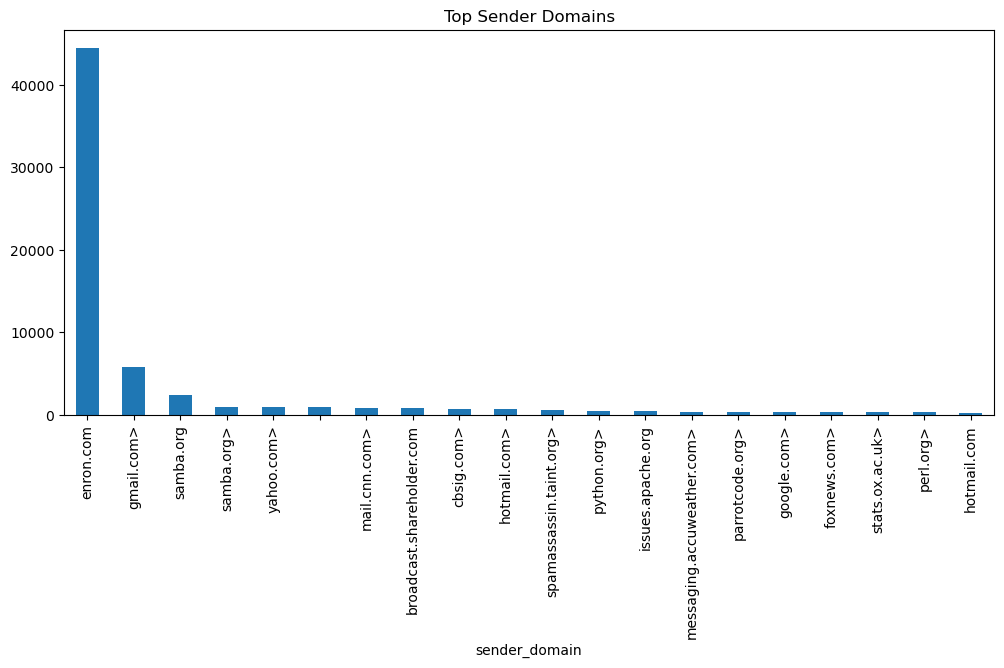

In [88]:
final['sender_domain'] = final['sender'].astype(str).apply(
    lambda x: x.split("@")[-1] if "@" in x else ""
)

plt.figure(figsize=(12,5))
final['sender_domain'].value_counts().head(20).plot(kind='bar')
plt.title("Top Sender Domains")
plt.show()

top bigrams

In [89]:
vec = CountVectorizer(stop_words='english', ngram_range=(2,2))
bag = vec.fit_transform(final[final.label==1]['body_clean'])

sum_words = bag.sum(axis=0)
bi_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
bi_freq = sorted(bi_freq, key=lambda x: x[1], reverse=True)

print("Top Spam Bigrams:", bi_freq[:20])

Top Spam Bigrams: [('news network', 8675), ('cable news', 8672), ('retail price', 7328), ('network lp', 5860), ('lp lllp', 5860), ('rights reserved', 4947), ('agreed receive', 4678), ('receive email', 4450), ('atlanta georgia', 4386), ('company rights', 4343), ('time warner', 4338), ('cnn center', 4336), ('center atlanta', 4336), ('georgia cable', 4336), ('warner company', 4336), ('cnncom result', 4336), ('result cnncom', 4336), ('cnncom preference', 4336), ('preference settings', 4336), ('settings manage', 4336)]


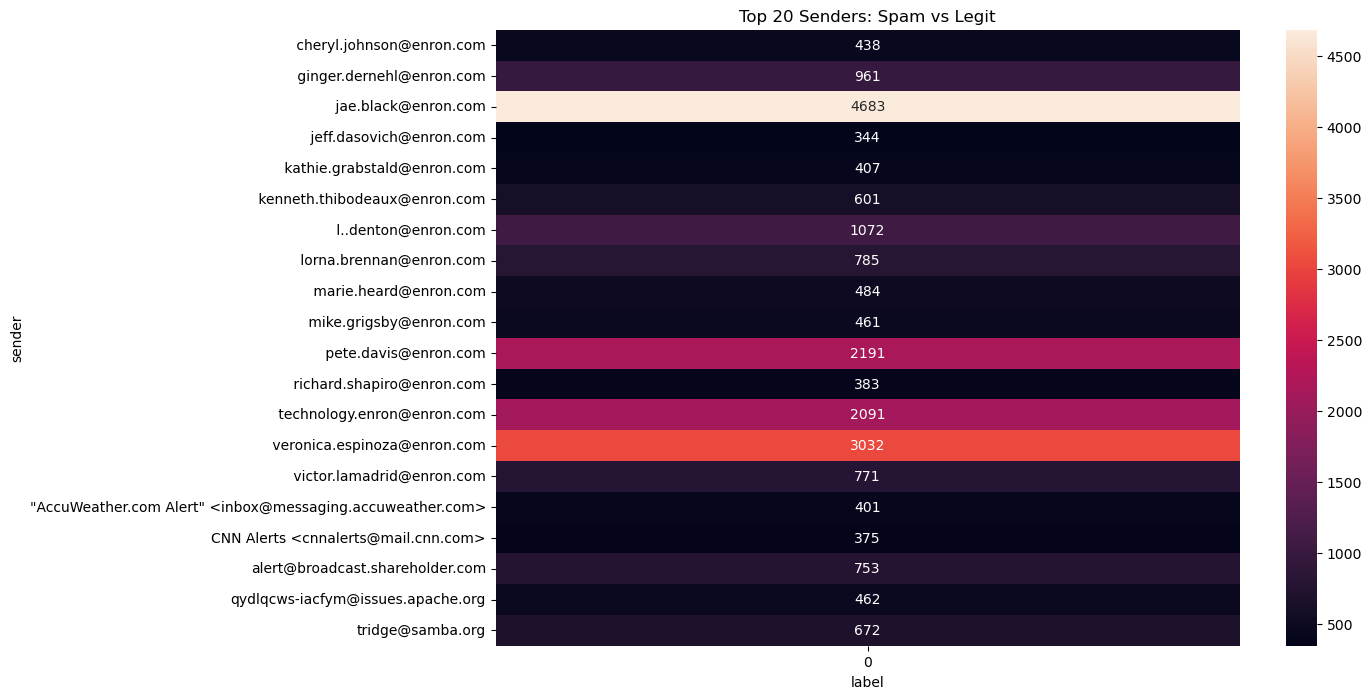

In [90]:
top_senders = final['sender'].value_counts().head(20).index
heat = pd.crosstab(final[final.sender.isin(top_senders)]['sender'],
                   final['label'])

plt.figure(figsize=(12,8))
sns.heatmap(heat, annot=True, fmt='d')
plt.title("Top 20 Senders: Spam vs Legit")
plt.show()

Keyword drift (spam vs legit)

In [91]:

tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(final['body_clean'])

spam_mean = X[final.label==1].mean(axis=0).A1
legit_mean = X[final.label==0].mean(axis=0).A1
words = tfidf.get_feature_names_out()

df_kw = pd.DataFrame({
    "word": words,
    "spam_tfidf": spam_mean,
    "legit_tfidf": legit_mean
})
df_kw["diff"] = df_kw.spam_tfidf - df_kw.legit_tfidf

df_kw.nlargest(20, "diff")

,word,spam_tfidf,legit_tfidf,diff
1454,replica,0.027754,0.000030,0.027724
1924,watches,0.024298,0.000059,0.024239
1342,price,0.026943,0.003017,0.023926
967,life,0.018361,0.001033,0.017328
1393,quality,0.016876,0.000656,0.016220
1152,news,0.025400,0.009857,0.015543
1073,men,0.015761,0.000325,0.015436
295,cnncom,0.016800,0.001555,0.015246
1011,love,0.016011,0.000990,0.015021
1192,online,0.016602,0.002086,0.014516


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(final['body_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

Training and Testing

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib

In [94]:
X = final['body_clean'].astype(str)
y = final['label']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    final['body_clean'], 
    final['label'], 
    test_size=0.2, 
    random_state=42,
    stratify=final['label']
)


In [96]:
tfidf = TfidfVectorizer(
    max_features=50000,
    stop_words='english',
    ngram_range=(1,2)
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [97]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("AUC:", auc)
    print(classification_report(y_test, preds))



===== Logistic Regression =====
Accuracy: 0.9729961276172853
AUC: 0.9666767289077588
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18849
           1       0.98      0.95      0.96     10332

    accuracy                           0.97     29181
   macro avg       0.97      0.97      0.97     29181
weighted avg       0.97      0.97      0.97     29181


===== Naive Bayes =====
Accuracy: 0.9593228470580172
AUC: 0.947695786841682
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18849
           1       0.98      0.91      0.94     10332

    accuracy                           0.96     29181
   macro avg       0.96      0.95      0.95     29181
weighted avg       0.96      0.96      0.96     29181


===== Linear SVM =====
Accuracy: 0.980603817552517
AUC: 0.976151780003055
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18849

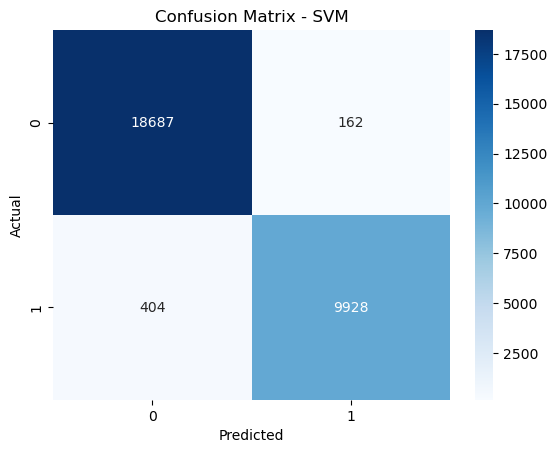

In [98]:
linearsvc = LinearSVC()
linearsvc.fit(X_train_vec, y_train)
preds = linearsvc.predict(X_test_vec)

cm = confusion_matrix(y_test, preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


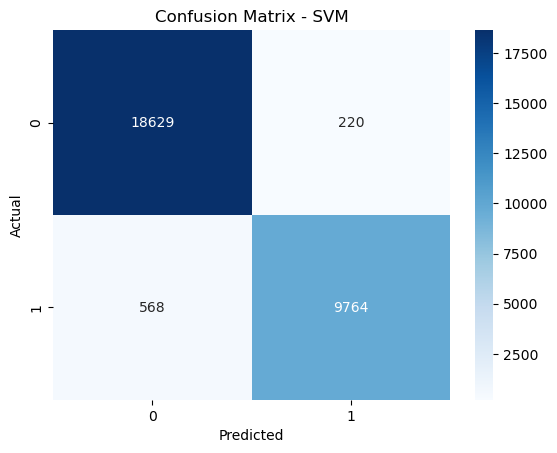

In [99]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_vec, y_train)
preds = lr.predict(X_test_vec)

cm = confusion_matrix(y_test, preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


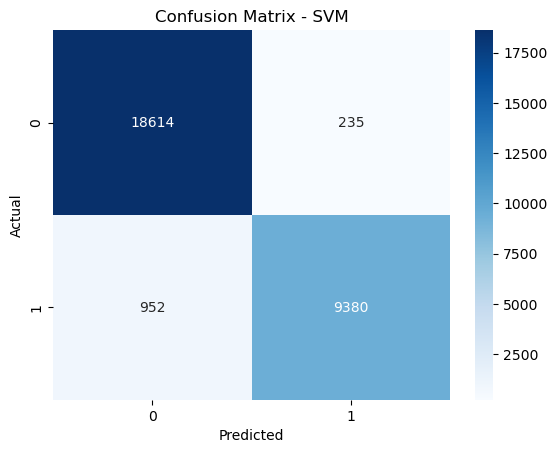

In [100]:
naivebays = MultinomialNB()
naivebays.fit(X_train_vec, y_train)
preds = naivebays.predict(X_test_vec)

cm = confusion_matrix(y_test, preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [101]:
from sklearn.metrics import roc_curve

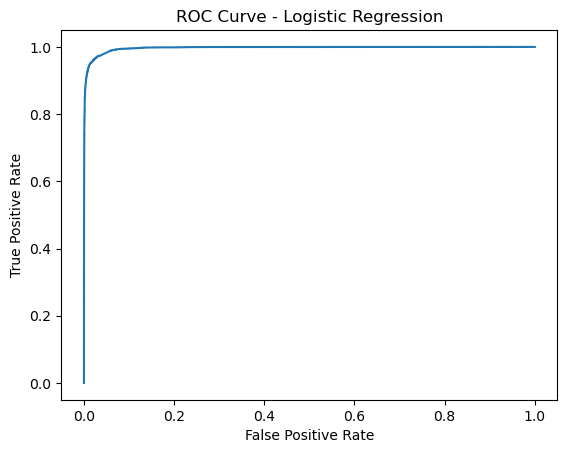

In [102]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_vec, y_train)
prob = lr.predict_proba(X_test_vec)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.plot(fpr, tpr)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


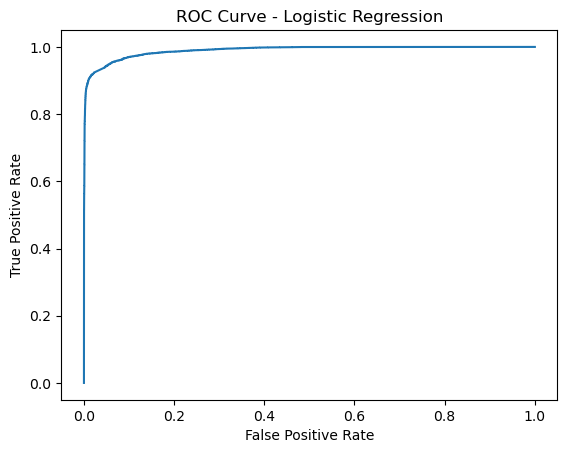

In [103]:
naivebays = MultinomialNB()
naivebays.fit(X_train_vec, y_train)
prob = naivebays.predict_proba(X_test_vec)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.plot(fpr, tpr)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


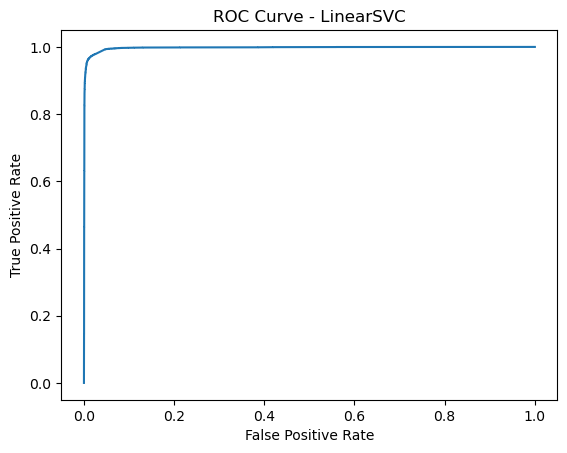

In [104]:
scores = linearsvc.decision_function(X_test_vec)

fpr, tpr, thresholds = roc_curve(y_test, scores)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LinearSVC")
plt.show()


In [105]:
joblib.dump(naivebays, "naivebays.pkl")
#joblib.dump(lr, "spam_classifier_svm.pkl")
#joblib.dump(linearsvm, "spam_classifier_svm.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model saved successfully!")


Model saved successfully!


In [106]:
def predict_email(text):
    vec = tfidf.transform([text])
    pred = naivebays.predict(vec)[0]
    return "Spam" if pred == 1 else "Legit"

predict_email("Congratulations, you won a free iPhone!")



'Spam'

train test Using  tensorflow keras